### LAB 12-1 오토인코더로 차원 축소하기

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 돌돌 말린 모양의 데이터
def make_a_roll(num_data) :
    # 롤 데이터 생성하기    
    f = 3
    unit_length = np.linspace(0, 1, num_data)
    t = f * unit_length * 3.14 
    x = np.sin(t) * (unit_length+0.5) + np.random.randn(num_data)*0.01
    z = np.cos(t) * unit_length + np.random.randn(num_data)*0.01
    y = + np.random.randn(num_data)*0.3
    r = unit_length
    g = -(2*(unit_length-0.5))**2 + 1
    b = 1-unit_length
    X = np.array( [x, y, z])
    C = np.array( [r, g, b])
    return X.T, C.T

m = 1500
X, color = make_a_roll(m) # 1500개의 롤데이터 생성

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers

# 인코더 입력은 3차원
enc = models.Sequential([layers.Dense(2, input_shape=[3], 
                                         activation = 'elu')]) # 활성화함수는 'elu'
# 디토더 입력은 2차원
dec = models.Sequential([layers.Dense(3, input_shape=[2], 
                                         activation = 'elu')]) # 활성화함수는 'elu'

In [6]:
# 오토인코더 AE는 인코더와 디코더를 결합하고, 평균 제곱근 오차를 사용하는 모델로 컴파일
AE = models.Sequential([enc, dec])
AE.compile(loss = 'mse')
AE.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 2)                 8         
                                                                 
 sequential_4 (Sequential)   (None, 3)                 9         
                                                                 
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
47/47 [==============================] - 0s 604us/step - loss: 0.5293
Epoch 2/30
47/47 [==============================] - 0s 568us/step - loss: 0.4566
Epoch 3/30
47/47 [==============================] - 0s 560us/step - loss: 0.3939
Epoch 4/30
47/47 [==============================] - 0s 583us/step - loss: 0.3381
Epoch 5/30
47/47 [==============================] - 0s 539us/step - loss: 0.2903
Epoch 6/30
47/47 [==============================] - 0s 561us/step - loss: 0.2507
Epoch 7/30
47/47 [==============================] - 0s 518us/step - loss: 0.2176
Epoch 8/30
47/47 [==============================] - 0s 562us/step - loss: 0.1912
Epoch 9/30
47/47 [==============================] - 0s 560us/step - loss: 0.1696
Epoch 10/30
47/47 [==============================] - 0s 570us/step - loss: 0.1524
Epoch 11/30
47/47 [==============================] - 0s 548us/step - loss: 0.1383
Epoch 12/30
47/47 [==============================] - 0s 520us/step - loss: 0.1263
Epoch 13/30
47/47 [======

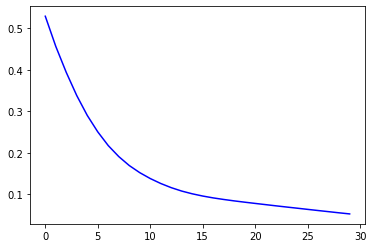

In [7]:
history = AE.fit(X, X, epochs = 30) # 원본데이터가 Target 값이기에 동일하다.
plt.plot(history.history['loss'], 'b-')

47/47 [==============================] - 0s 493us/step


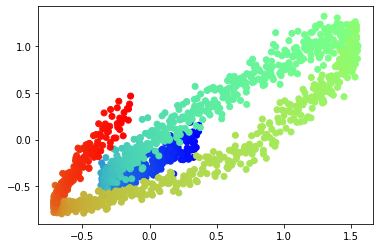

In [8]:
# 축소된 잠재표현은 Encoder를 이용해 얻을 수 있다.
reduced = enc.predict(X)
plt.scatter(reduced[:, 0], reduced[:, 1], color=color)
plt.show()
# 데이터를 인코더에 입력해 예측을 수행하고, 그 결과를 가시화해 차원축소결과를 얻을 수 있다.

### LAB 12-2 다층 구조 오토인코더로 차원 축소/복원

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def make_a_roll(num_data) :
    # Creating dataset    
    f = 3
    unit_length = np.linspace(0, 1, num_data)
    t = f * unit_length * 3.14 
    x = np.sin(t) * (unit_length+0.5) + np.random.randn(num_data)*0.01
    z = np.cos(t) * unit_length + np.random.randn(num_data)*0.01
    y = + np.random.randn(num_data)*0.3
    r = unit_length
    g = -(2*(unit_length-0.5))**2 + 1
    b = 1-unit_length
    X = np.array( [x, y, z])
    C = np.array( [r, g, b])
    return X.T, C.T    

m = 1500
X, color = make_a_roll(m)

In [26]:
from tensorflow.keras import models
from tensorflow.keras import layers

enc = models.Sequential([layers.Dense(2, input_shape=[3], 
                                        activation='elu'),
                        layers.Dense(2, activation='elu'),
                        layers.Dense(2, activation='elu')])
dec = models.Sequential([layers.Dense(2, input_shape=[2],
                                        activation='elu'),
                        layers.Dense(2, activation='elu'),
                        layers.Dense(3, activation='elu')])

In [27]:
AE = models.Sequential([enc, dec])
AE.compile(loss = 'mse')
history = AE.fit(X, X, epochs = 30)

Epoch 1/30
47/47 [==============================] - 0s 743us/step - loss: 0.9764
Epoch 2/30
47/47 [==============================] - 0s 674us/step - loss: 0.6408
Epoch 3/30
47/47 [==============================] - 0s 761us/step - loss: 0.4625
Epoch 4/30
47/47 [==============================] - 0s 804us/step - loss: 0.3693
Epoch 5/30
47/47 [==============================] - 0s 652us/step - loss: 0.3105
Epoch 6/30
47/47 [==============================] - 0s 739us/step - loss: 0.2661
Epoch 7/30
47/47 [==============================] - 0s 696us/step - loss: 0.2344
Epoch 8/30
47/47 [==============================] - 0s 739us/step - loss: 0.2111
Epoch 9/30
47/47 [==============================] - 0s 717us/step - loss: 0.1925
Epoch 10/30
47/47 [==============================] - 0s 761us/step - loss: 0.1772
Epoch 11/30
47/47 [==============================] - 0s 717us/step - loss: 0.1635
Epoch 12/30
47/47 [==============================] - 0s 717us/step - loss: 0.1502
Epoch 13/30
47/47 [======

47/47 [==============================] - 0s 470us/step


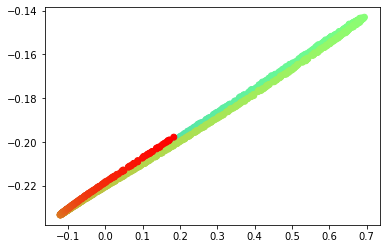

In [28]:
# 인코더를 이용해 잠재표현을 얻고 가시화
reduced = enc.predict(X)
plt.scatter(reduced[:, 0], reduced[:, 1], color=color)
plt.show()

47/47 [==============================] - 0s 435us/step


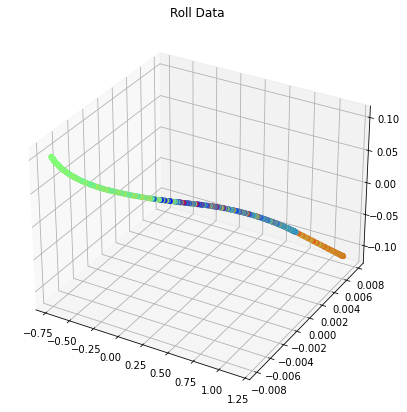

In [29]:
# 복원은 축소된 잠재표현을 디코더에 제공하면 된다.
rcvrd = dec.predict(reduced)
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(rcvrd[:,0], rcvrd[:,1], rcvrd[:,2], color = color)
plt.title("Roll Data")
plt.show()

### 12-3 오토인코더를 이용한 이미지 압축과 복원

In [10]:
# tf.keras를 임포트한다
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# 패션 MNIST 데이터는 keras의 데이터셋에 있으며, 이를 학습용, 테스트 데이터로 구분하자
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = \
                                    fashion_mnist.load_data()
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [11]:
def plot_images(nRow, nCol, img, cmap='gray'):
    fig = plt.figure()
    fig, ax = plt.subplots(nRow, nCol, figsize = (nCol,nRow))
    for i in range(nRow):
        for j in range(nCol):
            if nRow <= 1: axis = ax[j]
            else:         axis = ax[i, j]
            axis.get_xaxis().set_visible(False)
            axis.get_yaxis().set_visible(False)
            axis.imshow(img[i*nCol+j], cmap = cmap)

In [12]:
from tensorflow.keras import models
from tensorflow.keras import layers

# 인코더는 28 * 28 크기의 이미지를 펼쳐 784개의 성분을 가진 벡터 입력을 받고 잠재표현은 64차원
enc = models.Sequential([layers.Dense(64, input_shape=(784, ),
                                          activation='elu'),
                         layers.Dense(64, activation='elu'),
                         layers.Dense(64, activation='elu')])

# 디코더는 위의 64차원 잠재표현을 받아 다시 784차원의 이미지로 복원
dec = models.Sequential([layers.Dense(64, input_shape=(64, ),
                                          activation='elu'),
                         layers.Dense(64, activation='elu'),
                         layers.Dense(784, activation='elu')])

In [13]:
AE = models.Sequential([enc, dec])
AE.compile(loss = 'mse')
AE.summary()
# 117,840개의 파라미터를 가진 모델이다. 

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 64)                58560     
                                                                 
 sequential_7 (Sequential)   (None, 784)               59280     
                                                                 
Total params: 117,840
Trainable params: 117,840
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
1875/1875 [==============================] - 3s 1ms/step - loss: 2205.9585
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 1326.2788
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 1185.8901
Epoch 4/15
1875/1875 [==============================] - 2s 1ms/step - loss: 1101.2296
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 1055.0177
Epoch 6/15
1875/1875 [==============================] - 2s 1ms/step - loss: 1019.8286
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 997.2079
Epoch 8/15
1875/1875 [==============================] - 2s 1ms/step - loss: 978.9887
Epoch 9/15
1875/1875 [==============================] - 2s 1ms/step - loss: 965.4597
Epoch 10/15
1875/1875 [==============================] - 2s 1ms/step - loss: 954.0601
Epoch 11/15
1875/1875 [==============================] - 2s 1ms/step - loss: 943.7996
Epoch 12/15
1875/1875 [==============================] - 

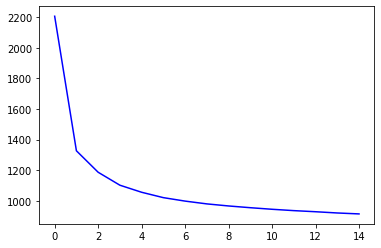

In [14]:
X = train_images.reshape(-1, 28*28)
history = AE.fit(X, X, epochs = 15)
plt.plot(history.history['loss'], 'b-')

In [15]:
rndidx = np.random.randint(0, len(train_images) - 50)
data = X[rndidx:rndidx+50]
train_reduced = enc.predict(data)
print(train_reduced.shape)

2/2 [==============================] - 0s 1ms/step
(50, 64)


<Figure size 432x288 with 0 Axes>

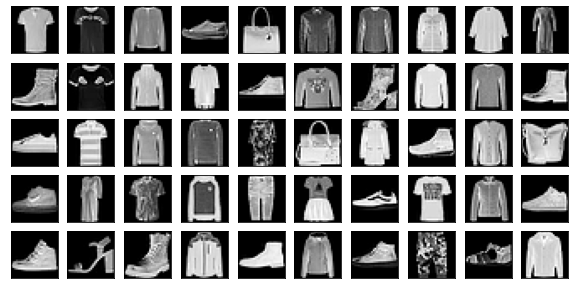

<Figure size 432x288 with 0 Axes>

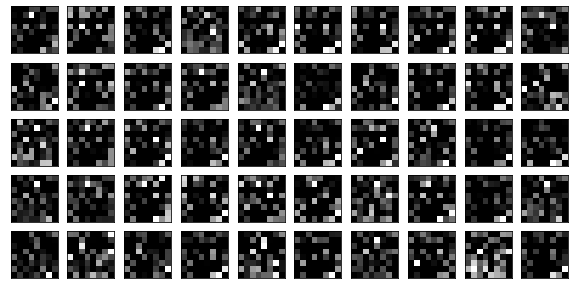

In [16]:
plot_images(5, 10, data.reshape(-1, 28, 28))
plot_images(5, 10, train_reduced.reshape(-1, 8, 8))

2/2 [==============================] - 0s 2ms/step


<Figure size 432x288 with 0 Axes>

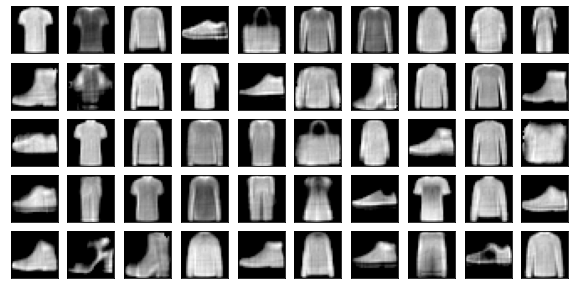

In [17]:
recovered = dec.predict(train_reduced)
plot_images(5, 10, recovered.reshape(-1, 28, 28))

<Figure size 432x288 with 0 Axes>

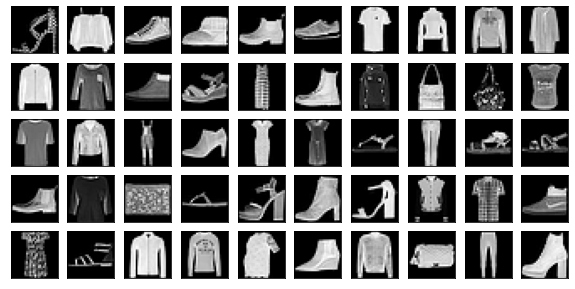

In [18]:
rndinx = np.random.randint(0, len(test_images) - 50)
samples = test_images[rndinx:rndinx+50]
plot_images(5, 10, samples)

2/2 [==============================] - 0s 2ms/step


<Figure size 432x288 with 0 Axes>

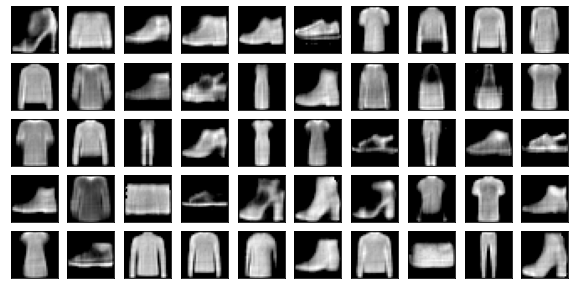

In [19]:
sample_flat = samples.reshape(-1, 28*28)
sample_reduced = enc.predict(sample_flat)
recovered = dec.predict(sample_reduced)
plot_images(5, 10, recovered.reshape(-1, 28, 28))

In [20]:
enc_cnn = models.Sequential([
               layers.Conv2D(filters=16, kernel_size=3,
                                 activation='elu', input_shape=(28,28,1)), # 28 * 28, 1(채널, 흑백)
               layers.Conv2D(filters=16, kernel_size=3, activation='elu'),
               layers.Flatten(),
               layers.Dense(64, activation='elu')])
enc_cnn.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_10 (Dense)            (None, 64)                589888    
                                                                 
Total params: 592,368
Trainable params: 592,368
Non-trainable params: 0
_________________________________________________________________


In [21]:
dec_cnn = models.Sequential([
      layers.Dense(9216, input_shape=(64, ), activation='elu'),
      layers.Reshape(target_shape=(24,24,16)),
      layers.Conv2DTranspose(filters=16, kernel_size=3, activation='elu'),
      layers.Conv2DTranspose(filters=1, kernel_size=3, activation='elu')])
dec_cnn.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 9216)              599040    
                                                                 
 reshape (Reshape)           (None, 24, 24, 16)        0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 26, 26, 16)       2320      
 nspose)                                                         
                                                                 
 conv2d_transpose_1 (Conv2DT  (None, 28, 28, 1)        145       
 ranspose)                                                       
                                                                 
Total params: 601,505
Trainable params: 601,505
Non-trainable params: 0
_________________________________________________________________


Epoch 1/15
1875/1875 [==============================] - 38s 20ms/step - loss: 1261.4087
Epoch 2/15
1875/1875 [==============================] - 37s 20ms/step - loss: 653.2419
Epoch 3/15
1875/1875 [==============================] - 37s 20ms/step - loss: 563.7138
Epoch 4/15
1875/1875 [==============================] - 37s 20ms/step - loss: 520.0484
Epoch 5/15
1875/1875 [==============================] - 37s 20ms/step - loss: 493.0527
Epoch 6/15
1875/1875 [==============================] - 37s 20ms/step - loss: 474.6928
Epoch 7/15
1875/1875 [==============================] - 38s 20ms/step - loss: 461.6779
Epoch 8/15
1875/1875 [==============================] - 38s 20ms/step - loss: 451.4841
Epoch 9/15
1875/1875 [==============================] - 38s 20ms/step - loss: 442.5068
Epoch 10/15
1875/1875 [==============================] - 38s 20ms/step - loss: 435.0826
Epoch 11/15
1875/1875 [==============================] - 38s 20ms/step - loss: 428.2032
Epoch 12/15
1875/1875 [=================

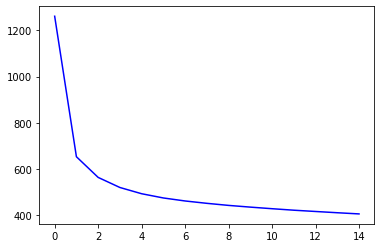

In [22]:
AE_CNN = models.Sequential([enc_cnn, dec_cnn])
AE_CNN.compile(loss = 'mse')
X_cnn = train_images.reshape(-1, 28, 28, 1)
history = AE_CNN.fit(X_cnn, X_cnn, epochs = 15)
plt.plot(history.history['loss'], 'b-')

<Figure size 432x288 with 0 Axes>

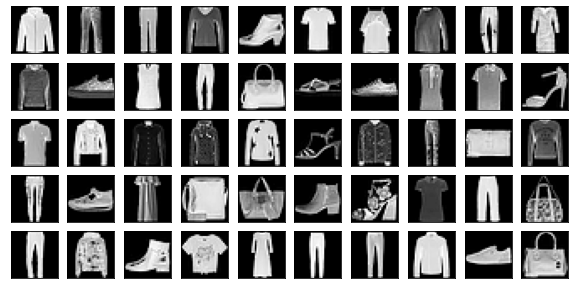

In [23]:
rndinx = np.random.randint(0, len(test_images) - 50)
samples = test_images[rndinx:rndinx+50]
plot_images(5, 10, samples)

2/2 [==============================] - 0s 3ms/step


<Figure size 432x288 with 0 Axes>

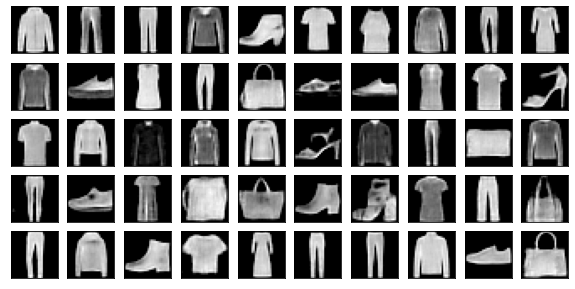

In [24]:
samples = samples.reshape(-1, 28, 28, 1)
reduced = enc_cnn.predict(samples)
recovered = dec_cnn.predict(reduced)
plot_images(5, 10, recovered.reshape(-1, 28, 28))